# Prophet extension

In [1]:
import numpy as np
import datetime
import os
from prophet_extension import fair_general_prophet_extended, fair_IID_prophet_extended, run_experiment_extended, grid_search
from ipynb.fs.defs.prophet import generate_distribution
from scipy.stats import ttest_ind
from tqdm import tqdm

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 15377.82it/s]


## Running experiments

FairGeneralProphet uniform


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5013.51it/s]


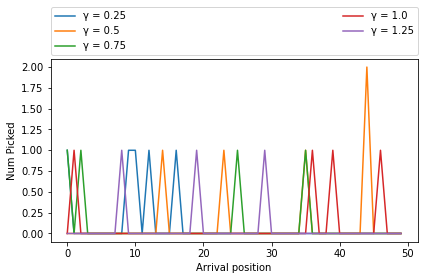

   epsilon  None rate  Mean value (None=0)  Mean value (excluding None)
0     0.25        0.0             0.959712                     0.959712
1     0.50        0.0             0.954264                     0.954264
2     0.75        0.2             0.789462                     0.986827
3     1.00        0.2             0.793646                     0.992058
4     1.25        0.4             0.599528                     0.999214
FairGeneralProphet binomial


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.92it/s]


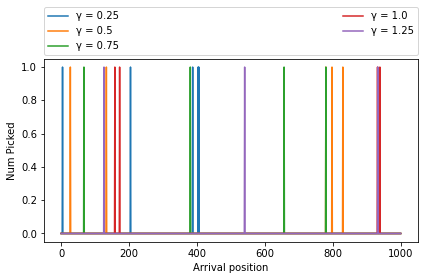

   epsilon  None rate  Mean value (None=0)  Mean value (excluding None)
0     0.25        0.0                546.0                        546.0
1     0.50        0.0                551.0                        551.0
2     0.75        0.2                444.0                        555.0
3     1.00        0.2                443.0                        554.0
4     1.25        0.4                335.0                        559.0
FairIIDProphet uniform


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5180.71it/s]


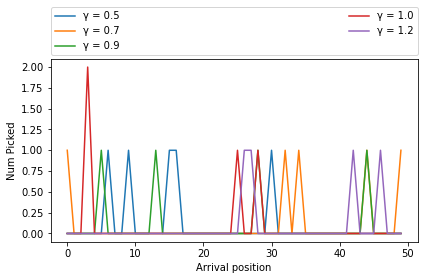

   epsilon  None rate  Mean value (None=0)  Mean value (excluding None)
0      0.5        0.0             0.973377                     0.973377
1      0.7        0.0             0.944452                     0.944452
2      0.9        0.2             0.790543                     0.988179
3      1.0        0.2             0.790410                     0.988012
4      1.2        0.2             0.792122                     0.990152
FairIIDProphet binomial


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 19.51it/s]


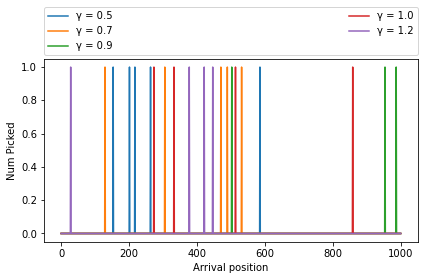

   epsilon  None rate  Mean value (None=0)  Mean value (excluding None)
0      0.5        0.0                551.0                        551.0
1      0.7        0.0                554.0                        554.0
2      0.9        0.4                331.0                        552.0
3      1.0        0.2                445.0                        556.0
4      1.2        0.2                442.0                        553.0


In [2]:
# Creating directory to save to
date_time = datetime.datetime.now().strftime("%d_%m_%H.%M")
path = os.path.join('images','extension',date_time)
if not os.path.exists(path):
    os.makedirs(path)

parameters_general_prophet = np.arange(0.25, 1.5, .25)
n_experiment_reps = 50000

# Fair general prophet Uniform distribution
grid_search(algorithm='FairGeneralProphet',
            n_experiment_reps = n_experiment_reps,
            distribution_type = 'uniform',
            n_candidates = 50,
            parameters = parameters_general_prophet,
            path = path)

# Fair general prophet Binomial distribution
grid_search(algorithm='FairGeneralProphet',
            n_experiment_reps = n_experiment_reps,
            distribution_type = 'binomial',
            n_candidates = 1000,
            parameters = parameters_general_prophet,
            path = path)

# Fair IID prophet Uniform distribution
parameters_fair_iid = np.arange(0.5, 1.3, 0.10)
## For clarity in the plots, we epsilon values 0.6, 0.8, or 1.1 from the grid search results
excluded_parameters = np.isin(parameters_fair_iid, [0.6, 0.8, 1.1], invert=True)
parameters_fair_iid = parameters_fair_iid[excluded_parameters]

# Fair IID prophet Uniform distribution
grid_search(algorithm='FairIIDProphet',
            n_experiment_reps = n_experiment_reps,
            distribution_type = 'uniform',
            n_candidates = 50,
            parameters = parameters_fair_iid,
            path = path)

# Fair IID prophet Binomial distribution
grid_search(algorithm='FairIIDProphet',
            n_experiment_reps = n_experiment_reps,
            distribution_type = 'binomial',
            n_candidates = 1000,
            parameters = parameters_fair_iid,
            path = path)

## Running the significance test for the extension, uniform distribution

_Output is two lists of 10x the avgInclude for the two groups. Group 1 is PaperValue, Group 2 is our ExtensionValue, for both FairProphet and FairIID._

In [3]:
fair_general_prophet_paper, fair_general_prophet_extension = [], []
fair_IID_prophet_paper, fair_IID_prophet_extension = [], []

fair_general_prophet_paper_exclude, fair_general_prophet_extension_exclude = [], []
fair_IID_prophet_paper_exclude, fair_IID_prophet_extension_exclude = [], []

fair_general_prophet_paper_parameter = 1
fair_IID_prophet_paper_parameter = 1
fair_general_prophet_extension_parameter = .5
fair_IID_prophet_extension_parameter = .7

for i in range(10):
    _, avg_include, avg_exclude, _ = run_experiment_extended(algorithm="FairGeneralProphet", 
                                                             n_experiment_reps=50000,
                                                             distribution_type="uniform", 
                                                             n_candidates=50, 
                                                             epsilon=fair_general_prophet_paper_parameter)
    fair_general_prophet_paper.append(avg_include)
    fair_general_prophet_paper_exclude.append(avg_exclude)
    
    _, avg_include, avg_exclude, _ = run_experiment_extended(algorithm="FairGeneralProphet", 
                                                             n_experiment_reps=50000,
                                                             distribution_type="uniform", 
                                                             n_candidates=50, 
                                                             epsilon=fair_general_prophet_extension_parameter)
    fair_general_prophet_extension.append(avg_include)
    fair_general_prophet_extension_exclude.append(avg_exclude)
    
    
for i in range(10):
    _, avg_include, avg_exclude, _ = run_experiment_extended(algorithm="FairIIDProphet", 
                                                             n_experiment_reps=50000,
                                                             distribution_type="uniform", 
                                                             n_candidates=50, 
                                                             epsilon=fair_IID_prophet_paper_parameter)
    fair_IID_prophet_paper.append(avg_include)
    fair_IID_prophet_paper_exclude.append(avg_exclude)
    
    _, avg_include, avg_exclude, _ = run_experiment_extended(algorithm="FairIIDProphet", 
                                                             n_experiment_reps=50000,
                                                             distribution_type="uniform", 
                                                             n_candidates=50, 
                                                             epsilon=fair_IID_prophet_extension_parameter)
    fair_IID_prophet_extension.append(avg_include)
    fair_IID_prophet_extension_exclude.append(avg_exclude)

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 15679.32it/s]


In [4]:
print(ttest_ind(fair_general_prophet_paper, fair_general_prophet_extension))
print(ttest_ind(fair_IID_prophet_paper, fair_IID_prophet_extension))

Ttest_indResult(statistic=-999.8095343787141, pvalue=3.691048778086906e-44)
Ttest_indResult(statistic=-345.4983376067289, pvalue=7.466900715614435e-36)


In [5]:
print(ttest_ind(fair_general_prophet_paper_exclude, fair_general_prophet_extension_exclude))
print(ttest_ind(fair_IID_prophet_paper_exclude, fair_IID_prophet_extension_exclude))

Ttest_indResult(statistic=225.10447977913304, pvalue=1.6653069667521698e-32)
Ttest_indResult(statistic=313.89125020823724, pvalue=4.197816950986595e-35)
